**1. IMPORTER LES LIBRAIRIES**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Train_Test_Split
from sklearn.model_selection import train_test_split

# Ré-échantillonnage
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Modélisation
from sklearn.ensemble import GradientBoostingClassifier

# Performances
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import f1_score

# Enregistrer le modèle
from sklearn import model_selection
import joblib

import warnings
warnings.filterwarnings('ignore')

**2. IMPORTER LE FICHIER**

*Stemming / TF-IDF / Réduction de dimension*

In [37]:
df_stem = pd.read_csv("4. Stemming_TF-IDF(Avec_Reduction).csv").astype('float16')
df_stem['y'] = df_stem['y'].astype('uint8')
df_stem = df_stem.rename(columns={'1099' : 'ponctuation', '1100' : 'sentiment'})

df_stem.info()
display(df_stem.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69243 entries, 0 to 69242
Columns: 1102 entries, 0 to y
dtypes: float16(1101), uint8(1)
memory usage: 145.5 MB


,0,1,2,3,4,5,6,7,8,9,...,1092,1093,1094,1095,1096,1097,1098,ponctuation,sentiment,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,-4.183594,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,-3.720703,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,5.550781,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,4.390625,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147949,0.625488,5


# **3. MODELISATION_1 (5 CLASSES)**

*1) Préparation des données*

In [38]:
# Target / Features
X_stem = df_stem.drop('y', axis = 1).to_numpy()
y_stem = df_stem['y'].to_numpy()

In [39]:
# Train_Test_Split
X_train_stem, X_test_stem, y_train_stem, y_test_stem = model_selection.train_test_split(X_stem, y_stem, test_size=0.2, random_state = 42)

In [40]:
# Vérification shape
print ("X_train_stem =", X_train_stem.shape)
print ("y_train_stem =", y_train_stem.shape)
print ("X_test_stem =", X_test_stem.shape)
print ("y_test_stem =", y_test_stem.shape)

X_train_stem = (55394, 1101)
y_train_stem = (55394,)
X_test_stem = (13849, 1101)
y_test_stem = (13849,)


In [41]:
# Undersampling
rUs = RandomUnderSampler(random_state = 42)
X_ru_stem, y_ru_stem = rUs.fit_resample(X_train_stem, y_train_stem)
print('Classes échantillon undersampled stemming :', dict(pd.Series(y_ru_stem).value_counts()))

Classes échantillon undersampled stemming : {1: 1406, 2: 1406, 3: 1406, 4: 1406, 5: 1406}


*2) Modélisation*

In [42]:
lr_list = [0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=2, random_state=42)
    clf.fit(X_ru_stem, y_ru_stem)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(clf.score(X_ru_stem, y_ru_stem)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(X_test_stem, y_test_stem)))

Learning rate:  0.1
Accuracy score (training): 0.494
Accuracy score (validation): 0.450
Learning rate:  0.25
Accuracy score (training): 0.590
Accuracy score (validation): 0.439
Learning rate:  0.5
Accuracy score (training): 0.663
Accuracy score (validation): 0.422
Learning rate:  0.75
Accuracy score (training): 0.683
Accuracy score (validation): 0.406
Learning rate:  1
Accuracy score (training): 0.683
Accuracy score (validation): 0.386


*3) Performances du modèle*

In [43]:
best_learning_rate = 0.1
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=best_learning_rate, max_depth=2, random_state=42)
clf2.fit(X_ru_stem, y_ru_stem)

y_pred_stem = clf2.predict(X_test_stem)
print("Score du modèle :", clf2.score(X_test_stem, y_test_stem))

print(classification_report_imbalanced(y_test_stem, y_pred_stem))
      
confusion_matrix = pd.crosstab(y_test_stem, y_pred_stem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

Score du modèle : 0.44985197487183193
                   pre       rec       spe        f1       geo       iba       sup

          1       0.48      0.47      0.93      0.48      0.66      0.42      1647
          2       0.07      0.35      0.86      0.11      0.55      0.28       405
          3       0.13      0.25      0.90      0.17      0.48      0.21       764
          4       0.26      0.27      0.82      0.26      0.47      0.21      2688
          5       0.75      0.53      0.73      0.62      0.62      0.38      8345

avg / total       0.57      0.45      0.79      0.49      0.59      0.34     13849



Classe prédite,1,2,3,4,5
Classe réelle,,,,,
1,781,377,157,115,217
2,75,141,77,36,76
3,84,223,192,117,148
4,173,418,356,716,1025
5,525,900,742,1778,4400


*4) Comparaison avec les autres modèles*

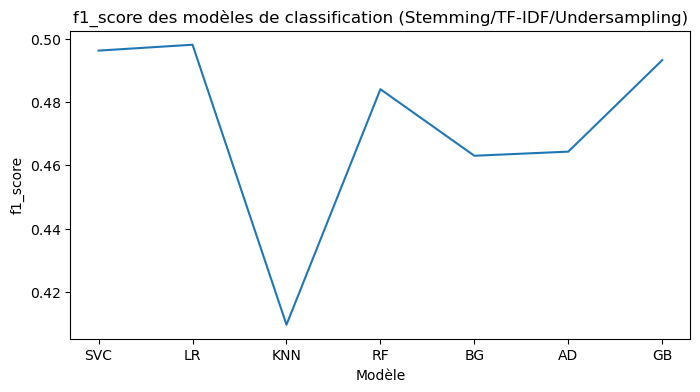

In [44]:
modeles = ['SVC', 'LR', 'KNN', 'RF', 'BG', 'AD', 'GB']
f1_score_stem = [0.49629836424221824, 0.4981612582704995, 0.409590256310432, 0.48409038796760245, 0.46303819836220056, 0.4643409798786885]
f1_score_stem.append(f1_score(y_test_stem, y_pred_stem, average='weighted'))
    
# f1_score des modèles
plt.figure(figsize = (8,4))
sns.lineplot(x=modeles, y=f1_score_stem)
plt.title("f1_score des modèles de classification (Stemming/TF-IDF/Undersampling)")
plt.xlabel('Modèle') 
plt.ylabel('f1_score')
plt.show()

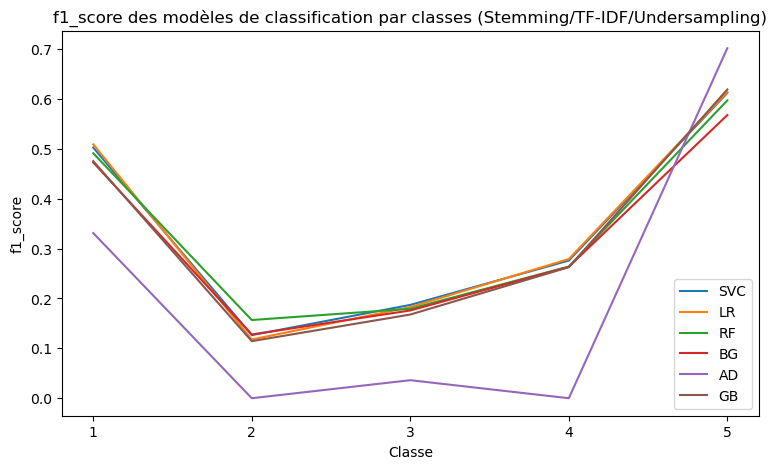

In [45]:
x = ['1', '2', '3', '4', '5']
GB_f1_stem = f1_score(y_test_stem, y_pred_stem, average=None)
SVC_f1_stem = [0.50266779, 0.12652508, 0.18714769, 0.27612761, 0.61220943]
LR_f1_stem = [0.50913907, 0.11776754, 0.18274112, 0.2791284,  0.61388568]
RF_f1_stem = [0.49134615, 0.15684154, 0.1793722,  0.26404996, 0.59731494]
BG_f1_stem_1 = [0.47285642, 0.12787213, 0.17599351, 0.26363636, 0.56787534]
AD_f1_stem_1 = [0.33118216, 0., 0.03614458, 0., 0.70192771]

# f1_score en fonction des classes pour chaque modèle
plt.figure(figsize = (9,5))
plt.title("f1_score des modèles de classification par classes (Stemming/TF-IDF/Undersampling)")
sns.lineplot(x=x, y=SVC_f1_stem, label='SVC')
sns.lineplot(x=x, y=LR_f1_stem, label='LR')
sns.lineplot(x=x, y=RF_f1_stem, label='RF')
sns.lineplot(x=x, y=BG_f1_stem_1, label='BG')
sns.lineplot(x=x, y=AD_f1_stem_1, label='AD')
sns.lineplot(x=x, y=GB_f1_stem, label='GB')
plt.xlabel('Classe') 
plt.ylabel('f1_score')
plt.legend()
plt.show()

*5) Enregistrement du modèle*

In [46]:
joblib.dump(clf2, '6.c) gradient_boosting_1.pkl')

['6.c) gradient_boosting_1.pkl']

# **4. MODELISATION_2 (BINAIRE)**

*1) Préparation des données*

In [47]:
### Classification binaire
# Classe 0 : [1, 2, 3]
# Classe 1 : [4, 5]
df_stem['y'] = df_stem['y'].replace((1, 2, 3, 4, 5), (0, 0, 0, 1, 1))

In [48]:
# Target / Features
X_stem = df_stem.drop('y', axis = 1).to_numpy()
y_stem = df_stem['y'].to_numpy()

In [49]:
# Train_Test_Split
X_train_stem, X_test_stem, y_train_stem, y_test_stem = model_selection.train_test_split(X_stem, y_stem, test_size=0.2, random_state = 42)

In [50]:
# Undersampling
rUs = RandomUnderSampler(random_state = 42)
X_ru_stem, y_ru_stem = rUs.fit_resample(X_train_stem, y_train_stem)
print('Classes échantillon undersampled stemming :', dict(pd.Series(y_ru_stem).value_counts()))

Classes échantillon undersampled stemming : {0: 11376, 1: 11376}


*2) Modélisation*

In [51]:
for learning_rate in lr_list:
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=2, random_state=42)
    clf.fit(X_ru_stem, y_ru_stem)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(clf.score(X_ru_stem, y_ru_stem)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(X_test_stem, y_test_stem)))

Learning rate:  0.1
Accuracy score (training): 0.731
Accuracy score (validation): 0.736
Learning rate:  0.25
Accuracy score (training): 0.759
Accuracy score (validation): 0.756
Learning rate:  0.5
Accuracy score (training): 0.779
Accuracy score (validation): 0.763
Learning rate:  0.75
Accuracy score (training): 0.793
Accuracy score (validation): 0.765
Learning rate:  1
Accuracy score (training): 0.793
Accuracy score (validation): 0.763


*3) Performances du modèle*

In [52]:
best_learning_rate = 0.75
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=best_learning_rate, max_depth=2, random_state=42)
clf3.fit(X_ru_stem, y_ru_stem)

y_pred_stem = clf3.predict(X_test_stem)
print("Score du modèle :", clf3.score(X_test_stem, y_test_stem))

print(classification_report_imbalanced(y_test_stem, y_pred_stem))
      
confusion_matrix = pd.crosstab(y_test_stem, y_pred_stem, rownames=['Classe réelle'], colnames=['Classe prédite'])
display(confusion_matrix)

Score du modèle : 0.7654704310780561
                   pre       rec       spe        f1       geo       iba       sup

          0       0.45      0.74      0.77      0.56      0.75      0.57      2816
          1       0.92      0.77      0.74      0.84      0.75      0.57     11033

avg / total       0.83      0.77      0.74      0.78      0.75      0.57     13849



Classe prédite,0,1
Classe réelle,,
0,2076,740
1,2508,8525


*4) Comparaison avec les autres modèles*

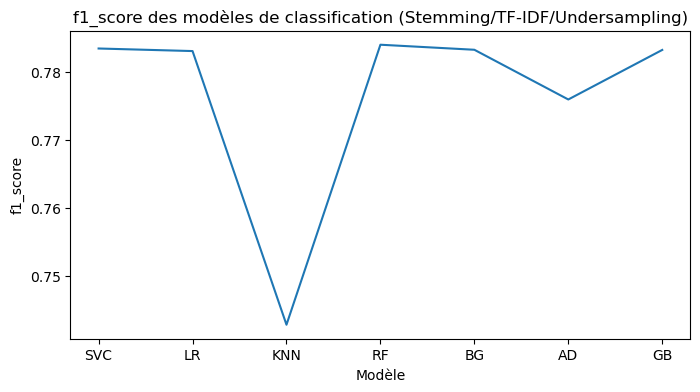

In [53]:
# f1_score des modèles
f1_score_stem = [0.7834833116104407, 0.7831066608668746, 0.7428909489343529, 0.7840386510902665, 0.7832977643496211, 0.7759917052772154]
f1_score_stem.append(f1_score(y_test_stem, y_pred_stem, average='weighted'))

plt.figure(figsize = (8,4))
sns.lineplot(x=modeles, y=f1_score_stem)
plt.title("f1_score des modèles de classification (Stemming/TF-IDF/Undersampling)")
plt.xlabel('Modèle') 
plt.ylabel('f1_score')
plt.show()

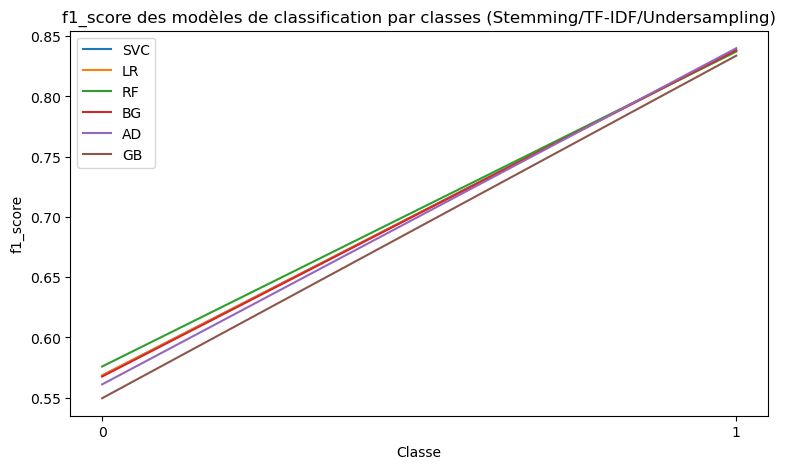

In [54]:
x = ['0', '1']
GB_f1_stem = f1_score(y_test_stem, y_pred_stem, average=None)
SVC_f1_stem = [0.56843779, 0.8383703]
LR_f1_stem = [0.56848228, 0.83788616]
RF_f1_stem = [0.57592713, 0.83715585]
BG_f1_stem_2 = [0.56759984, 0.83835127]
AD_f1_stem_2 = [0.54961832, 0.83376996]

# f1_score en fonction des classes pour chaque modèle
plt.figure(figsize = (9,5))
plt.title("f1_score des modèles de classification par classes (Stemming/TF-IDF/Undersampling)")
sns.lineplot(x=x, y=SVC_f1_stem, label='SVC')
sns.lineplot(x=x, y=LR_f1_stem, label='LR')
sns.lineplot(x=x, y=RF_f1_stem, label='RF')
sns.lineplot(x=x, y=BG_f1_stem_2, label='BG')
sns.lineplot(x=x, y=GB_f1_stem, label='AD')
sns.lineplot(x=x, y=AD_f1_stem_2, label='GB')
plt.xlabel('Classe') 
plt.ylabel('f1_score')
plt.legend()
plt.show()

*5) Enregistrement du modèle*

In [55]:
joblib.dump(clf3, '6.c) gradient_boosting_2.pkl')

['6.c) gradient_boosting_2.pkl']